In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from math import cos, asin, sqrt
import matplotlib.pyplot as plt
import numpy as np
import pickle
import math
import xarray as xr
import netCDF4 as nc
from matplotlib import ticker, cm
from matplotlib import animation, rc
import matplotlib.tri as tri
import sys
#import metpy.calc as mpcalc
#from metpy.cbook import get_test_data
#from metpy.interpolate import cross_section
import scipy.ndimage as ndimage
from mpl_toolkits.axes_grid1 import make_axes_locatable
sys.setrecursionlimit(9000)
import scipy.ndimage
import statistics
import scipy.io
import pandas as pd
from cartopy.util import add_cyclic_point

In [2]:
ne4_PATH = '/media/liran/Data1/Project/UCI_GUI/ne4pg2_scrip.nc'
ne4_files = xr.open_mfdataset(ne4_PATH)
lat_ne4   = ne4_files.grid_center_lat.values
lon_ne4   = ne4_files.grid_center_lon.values
lat_ne4_corner   = ne4_files.grid_corner_lat.values
lon_ne4_corner   = ne4_files.grid_corner_lon.values

In [3]:
# Function find nearby column index
def findnearbycolumn_v2(lat, lon, latc, lonc):
    ncol = len(lon)
    kclose = 8
    outputind = np.zeros((len(lon), kclose))
    for i1 in range(0,ncol,1):
        testlon = lon[i1]
        testlat = lat[i1]
        testlonc0 = lonc[i1,0]
        testlatc0 = latc[i1,0]
        testlonc1 = lonc[i1,1]
        testlatc1 = latc[i1,1]
        testlonc2 = lonc[i1,2]
        testlatc2 = latc[i1,2]
        testlonc3 = lonc[i1,3]
        testlatc3 = latc[i1,3]
        temp = np.zeros(len(lon))
        
        arr0 = abs(testlonc3-lonc[:,1])
        arr1 = abs(testlatc3-latc[:,1])
        min_index = np.argmin(arr0+arr1)
        outputind[i1,0] = min_index
        arr0 = abs(testlonc2-lonc[:,0])
        arr1 = abs(testlatc2-latc[:,0])
        min_index = np.argmin(arr0+arr1)
        outputind[i1,2] = min_index
        arr0 = abs(testlonc0-lonc[:,2])
        arr1 = abs(testlatc0-latc[:,2])
        min_index = np.argmin(arr0+arr1)
        outputind[i1,5] = min_index
        arr0 = abs(testlonc1-lonc[:,3])
        arr1 = abs(testlatc1-latc[:,3])
        min_index = np.argmin(arr0+arr1)
        outputind[i1,7] = min_index
        arr0 = abs(testlonc0-lonc[:,3])
        arr1 = abs(testlatc0-latc[:,3])
        min_index = np.argmin(arr0+arr1)
        outputind[i1,6] = min_index
        arr0 = abs(testlonc3-lonc[:,2])
        arr1 = abs(testlatc3-latc[:,2])
        arr3 = abs(testlonc0-lonc[:,1])
        arr4 = abs(testlatc0-latc[:,1])
        min_index = np.argmin(arr0+arr1+arr3+arr4)
        outputind[i1,3] = min_index
        arr0 = abs(testlonc2-lonc[:,3])
        arr1 = abs(testlatc2-latc[:,3])
        arr3 = abs(testlonc1-lonc[:,0])
        arr4 = abs(testlatc1-latc[:,0])
        min_index = np.argmin(arr0+arr1+arr3+arr4)
        outputind[i1,4] = min_index
        arr0 = abs(testlonc3-lonc[:,0])
        arr1 = abs(testlatc3-latc[:,0])
        arr3 = abs(testlonc2-lonc[:,1])
        arr4 = abs(testlatc2-latc[:,1])
        min_index = np.argmin(arr0+arr1+arr3+arr4)
        outputind[i1,1] = min_index
    return outputind

In [4]:
nindv2 = findnearbycolumn_v2(lat_ne4, lon_ne4, lat_ne4_corner,lon_ne4_corner)

24.0
25.0
28.0
10.0
14.0
8.0
9.0
12.0


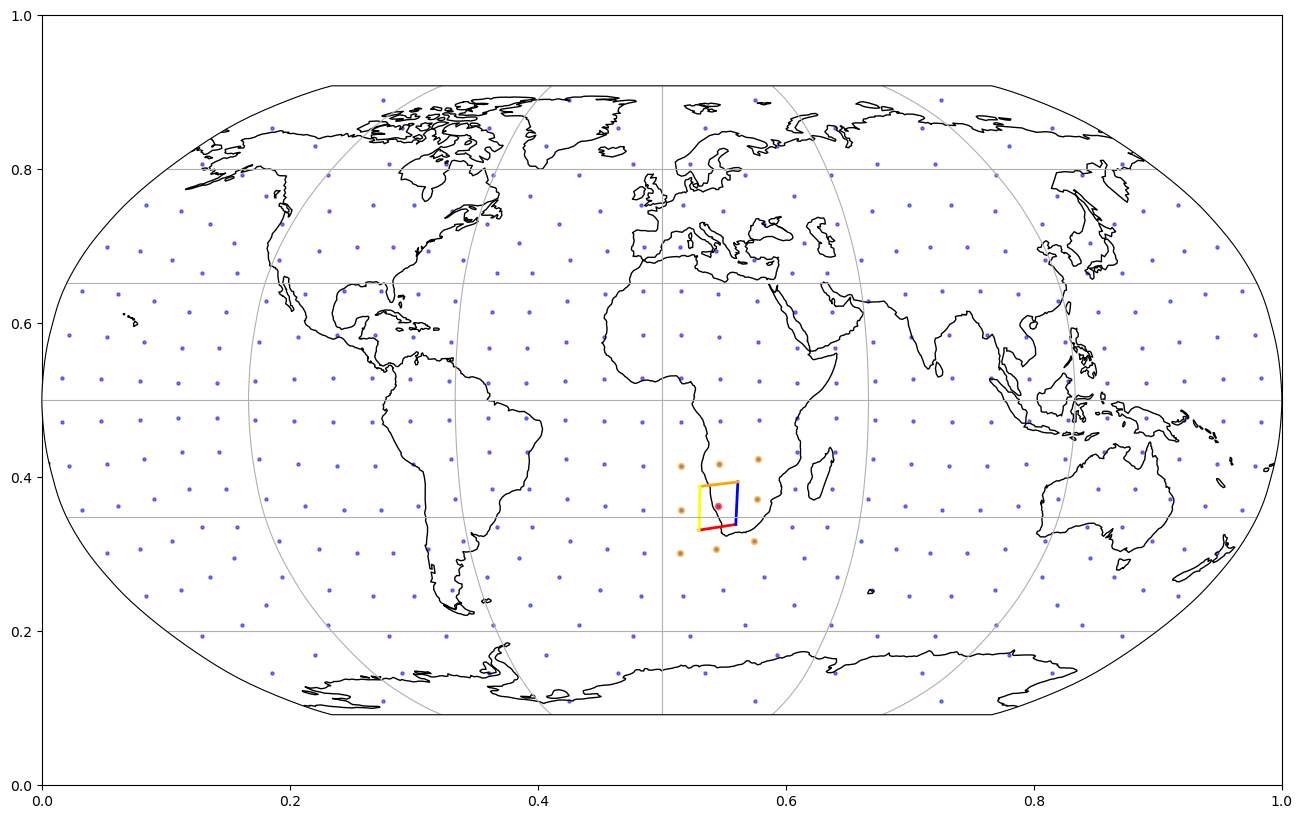

In [5]:
# Check the location of the selected column
#-- create figure and axes object
fig, ax = plt.subplots(figsize=(16,10))
thresh = 11
#-- choose map projection
ax = fig.add_subplot(1,1,1, projection=ccrs.Robinson())
ax.set_global()
#-- add coastlines, country border lines, and grid lines
ax.coastlines()
ax.gridlines()

testind = 11
for il in range(len(lat_ne4)):
    plt.scatter(lon_ne4[il], lat_ne4[il],
                color="blue",
                s=5,
                alpha=0.5,
                transform=ccrs.PlateCarree()) ## Important

plt.scatter(lon_ne4[testind], lat_ne4[testind],
            color="red",
            s=20,
            alpha=0.5,
            transform=ccrs.PlateCarree()) ## Important

plt.plot(lon_ne4_corner[testind,0:2], lat_ne4_corner[testind,0:2], color='red', linestyle='-', linewidth=2,transform=ccrs.PlateCarree())
plt.plot(lon_ne4_corner[testind,1:3], lat_ne4_corner[testind,1:3], color='blue', linestyle='-', linewidth=2,transform=ccrs.PlateCarree())
plt.plot(lon_ne4_corner[testind,2:4], lat_ne4_corner[testind,2:4], color='orange', linestyle='-', linewidth=2,transform=ccrs.PlateCarree())
plt.plot([lon_ne4_corner[testind,3],lon_ne4_corner[testind,0]], [lat_ne4_corner[testind,3],lat_ne4_corner[testind,0]], color='yellow', linestyle='-', linewidth=2,transform=ccrs.PlateCarree())


for il2 in range(8):
    print(nindv2[testind,il2])
    plt.scatter(lon_ne4[int(nindv2[testind,il2])], lat_ne4[int(nindv2[testind,il2])],
                color="orange",
                s=20,
                alpha=0.5,
                transform=ccrs.PlateCarree()) ## Important


In [6]:
np.savez('ne4pg2_Table_v2.npz', nind=nindv2, lon_ne4=lon_ne4, lat_ne4=lat_ne4)


In [7]:
data = np.load('ne4pg2_Table_v2.npz')
loaded_nind = data['nind']
loaded_lon_ne4 = data['lon_ne4']
loaded_lat_ne4 = data['lat_ne4']

In [8]:
ne30_PATH = '/media/liran/Data1/Project/UCI_GUI/ne30pg2_scrip.nc'
ne30_files = xr.open_mfdataset(ne30_PATH)
lat_ne30   = ne30_files.grid_center_lat.values
lon_ne30   = ne30_files.grid_center_lon.values
lat_ne30_corner   = ne30_files.grid_corner_lat.values
lon_ne30_corner   = ne30_files.grid_corner_lon.values

In [9]:
nind30v2 = findnearbycolumn_v2(lat_ne30, lon_ne30, lat_ne30_corner,lon_ne30_corner)

24.0
24.0
25.0
10.0
11.0
8.0
8.0
9.0


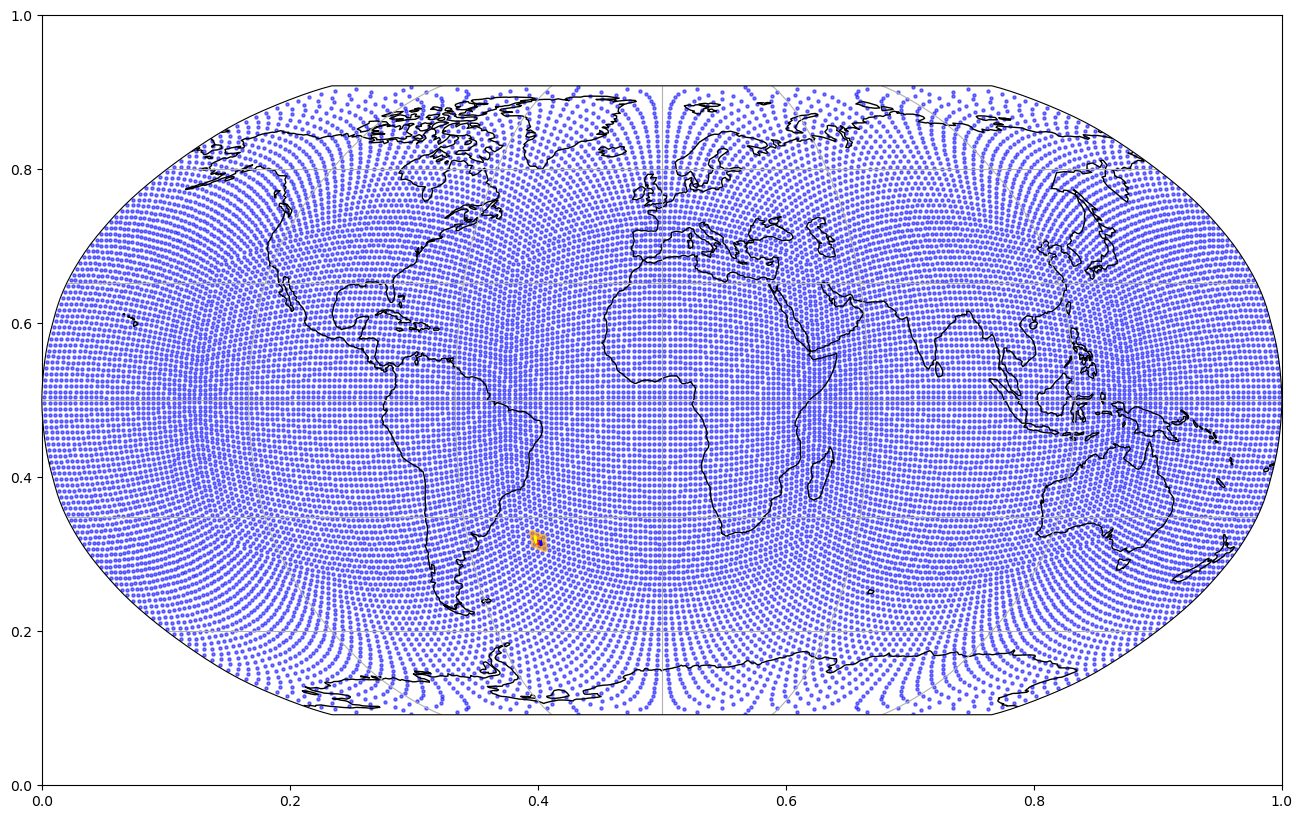

In [10]:
# Check the location of the selected column
#-- create figure and axes object
fig, ax = plt.subplots(figsize=(16,10))
thresh = 16
#-- choose map projection
ax = fig.add_subplot(1,1,1, projection=ccrs.Robinson())
ax.set_global()
#-- add coastlines, country border lines, and grid lines
ax.coastlines()
ax.gridlines()

testind = 10
for il in range(len(lat_ne30)):
    plt.scatter(lon_ne30[il], lat_ne30[il],
                color="blue",
                s=5,
                alpha=0.5,
                transform=ccrs.PlateCarree()) ## Important

plt.scatter(lon_ne30[testind], lat_ne30[testind],
            color="red",
            s=20,
            alpha=0.5,
            transform=ccrs.PlateCarree()) ## Important

plt.plot(lon_ne30_corner[testind,0:2], lat_ne30_corner[testind,0:2], color='red', linestyle='-', linewidth=2,transform=ccrs.PlateCarree())
plt.plot(lon_ne30_corner[testind,1:3], lat_ne30_corner[testind,1:3], color='blue', linestyle='-', linewidth=2,transform=ccrs.PlateCarree())
plt.plot(lon_ne30_corner[testind,2:4], lat_ne30_corner[testind,2:4], color='orange', linestyle='-', linewidth=2,transform=ccrs.PlateCarree())
plt.plot([lon_ne30_corner[testind,3],lon_ne30_corner[testind,0]], [lat_ne30_corner[testind,3],lat_ne30_corner[testind,0]], color='yellow', linestyle='-', linewidth=2,transform=ccrs.PlateCarree())


for il2 in range(8):
    print(nindv2[testind,il2])
    plt.scatter(lon_ne30[int(nind30v2[testind,il2])], lat_ne30[int(nind30v2[testind,il2])],
                color="orange",
                s=20,
                alpha=0.5,
                transform=ccrs.PlateCarree()) ## Important

In [11]:
np.savez('ne30pg2_Table_v2.npz', nind=nind30v2, lon_ne30=lon_ne30, lat_ne30=lat_ne30)

In [12]:
data = np.load('ne30pg2_Table_v2.npz')
loaded_nind = data['nind']
loaded_lon_ne30 = data['lon_ne30']
loaded_lat_ne30 = data['lat_ne30']